<a href="https://colab.research.google.com/github/melany-rios/Reducci-n-de-Desperdicios-de-Productos-en-Supermercados/blob/main/Reduccion_de_Desperdicios_de_Productos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧾 **Proyecto: Reducción de Desperdicio de Productos en Supermercados**

El presente proyecto forma parte de la materia **Gestión de Proyectos de Servicios Profesionales**, dentro de la **Tecnicatura en Ciencia de Datos e Inteligencia Artificial**.  

Su objetivo principal es **desarrollar un prototipo analítico que permita reducir el desperdicio de productos en supermercados**, optimizando la gestión de inventarios, anticipando fechas de vencimiento y fortaleciendo las acciones de donación hacia comedores comunitarios.

---

## 🏪 **Contexto**

El proyecto se sitúa en una **cadena de supermercados de la ciudad de Santiago del Estero**, compuesta por cuatro sucursales:

| Sucursal | Característica | Nivel de desperdicio | Nivel de ventas |
|-----------|----------------|----------------------|-----------------|
| Norte | Sede principal, alta rotación | Bajo | Alto |
| Este | Mayor desperdicio, baja rotación | Alto | Medio |
| Sur | Rotación media | Medio | Medio |
| Oeste | Rotación estable, menor tráfico | Medio-bajo | Medio-bajo |

Cada sucursal presenta dinámicas distintas de ventas, rotación y gestión de productos perecederos y no perecederos, lo cual permite analizar comportamientos diferenciados en el flujo de inventario.

---

## 🧠 **Enfoque de simulación de datos**

Dado que no se dispone de información real de la empresa, el proyecto utiliza **datasets sintéticos generados con Python**, con características **semi-realistas** basadas en supuestos razonables del funcionamiento de un supermercado.  

El uso de datos sintéticos permite **replicar escenarios reales** sin vulnerar la privacidad ni la confidencialidad de datos comerciales.  
Los datasets fueron creados mediante las librerías `Faker`, `Pandas` y `NumPy`, y reflejan variaciones entre sucursales, categorías de productos, fechas de vencimiento y comportamiento de ventas.

Todos los datos se exportan en formato `.csv` para su posterior análisis en **Google Colab** y visualización interactiva en **Streamlit**.

---

## 📂 **Descripción de los archivos CSV**

### 1️⃣ `ventas.csv`
Contiene el registro histórico de ventas por fecha, producto, categoría y sucursal.  
Permite analizar patrones de consumo, productos de alta/baja rotación y desempeño comercial.  
**Columnas:**  
`id_venta`, `fecha`, `producto`, `categoria`, `sucursal`, `cantidad`, `precio_unitario`

---

### 2️⃣ `inventario.csv`
Incluye el detalle de los productos en stock junto con su fecha de vencimiento.  
Es esencial para detectar productos próximos a vencer y definir estrategias de oferta o donación.  
**Columnas:**  
`id_producto`, `producto`, `categoria`, `sucursal`, `stock`, `fecha_vencimiento`

---

### 3️⃣ `descarte.csv`
Registra los productos descartados por vencimiento, mal estado o rotura.  
Permite medir el nivel de **merma** por sucursal y categoría.  
**Columnas:**  
`id_descarte`, `producto`, `sucursal`, `fecha`, `cantidad`, `motivo`

---

### 4️⃣ `proveedores.csv`
Reúne información sobre los proveedores de cada categoría de productos, permitiendo analizar tiempos de entrega y eficiencia logística.  
**Columnas:**  
`id_proveedor`, `nombre`, `tiempo_entrega_dias`, `categoria`

---

### 5️⃣ `comedores.csv`
Contiene el registro de organizaciones sociales y comedores comunitarios que reciben donaciones de productos aún aptos para el consumo, en el marco del programa de responsabilidad social del supermercado.  
**Columnas:**  
`id_comedor`, `nombre`, `direccion`, `zona`, `cantidad_donaciones`, `ultimo_envio`, `contacto`

---

## 🎯 **Objetivo del prototipo**

El prototipo busca **demostrar cómo el análisis de datos y la inteligencia artificial pueden mejorar la eficiencia operativa y la sostenibilidad social en supermercados**, mediante:

- Detección de productos con fechas próximas a vencerse.  
- Identificación de sucursales con mayor nivel de merma.  
- Generación de recomendaciones para **ofertas o donaciones**.  
- Cálculo de **indicadores clave (KPIs)** sobre desperdicio, ventas y donaciones.  

---

## 🌍 **Impacto esperado**

El proyecto combina **eficiencia operativa, sostenibilidad ambiental y responsabilidad social**, mostrando cómo la **Ciencia de Datos aplicada** puede generar beneficios tanto económicos como sociales.  
De esta forma, se contribuye a **reducir el desperdicio alimentario**, **optimizar recursos** y **fortalecer la imagen responsable** del supermercado ante la comunidad.


# 1. Instalación de librerías necesarias

In [1]:
!pip install pandas numpy matplotlib seaborn faker -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 27.4 MB/s eta 0:00:00


# 2. Importación de librerías

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from faker import Faker
import random
from datetime import datetime, timedelta


# 3. Configuración General

In [3]:
fake = Faker('es_ES')
np.random.seed(42)
sns.set(style="whitegrid")

sucursales = ["Norte", "Sur", "Este", "Oeste"]
categorias = {
    "Lácteos": ["Leche Entera 1L", "Yogur Natural", "Queso Cremoso"],
    "Panificados": ["Pan Blanco", "Facturas", "Galletas dulces"],
    "Carnes": ["Carne Vacuna", "Pollo Entero", "Embutidos"],
    "Frutas y Verduras": ["Manzana", "Banana", "Lechuga"],
    "Enlatados": ["Atún en lata", "Arvejas en lata", "Maíz dulce"],
    "Secos": ["Arroz 1kg", "Fideos Spaghetti", "Harina 000"],
    "Bebidas": ["Agua Mineral 2L", "Gaseosa Cola", "Jugo Naranja"]
}

# 4. Generación de CSVs

In [9]:
fake = Faker('es_ES')
np.random.seed(42)

sucursales = ["Norte", "Sur", "Este", "Oeste"]
categorias = ["Lácteos", "Panificados", "Bebidas", "Frutas y Verduras", "Limpieza", "Enlatados"]
productos = ["Leche", "Yogur", "Pan", "Jugo", "Manzana", "Arroz", "Fideos", "Jabón", "Tomate en lata", "Detergente"]

# Ventas
fechas = pd.date_range(datetime(2025,1,1), datetime(2025,3,31), freq="D")
ventas = pd.DataFrame({
    "id_venta": range(1, 1001),
    "fecha": np.random.choice(fechas, 1000),
    "producto": np.random.choice(productos, 1000),
    "categoria": np.random.choice(categorias, 1000),
    "sucursal": np.random.choice(sucursales, 1000),
    "cantidad": np.random.randint(1, 20, 1000),
    "precio_unitario": np.random.uniform(100, 1000, 1000).round(2)
})

# Inventario
inventario = pd.DataFrame({
    "id_producto": range(1, 501),
    "producto": np.random.choice(productos, 500),
    "categoria": np.random.choice(categorias, 500),
    "sucursal": np.random.choice(sucursales, 500),
    "stock": np.random.randint(10, 200, 500),
    "fecha_vencimiento": [datetime.now() + timedelta(days=random.randint(1, 20)) for _ in range(500)]
})

# Descarte
motivos = ["Vencimiento", "Mal estado", "Rotura de empaque"]
descarte = pd.DataFrame({
    "id_descarte": range(1, 301),
    "producto": np.random.choice(productos, 300),
    "categoria": np.random.choice(categorias, 300),
    "sucursal": np.random.choice(sucursales, 300),
    "fecha": np.random.choice(fechas, 300),
    "cantidad": np.random.randint(1, 15, 300),
    "motivo": np.random.choice(motivos, 300)
})

# Proveedores
proveedores = pd.DataFrame({
    "id_proveedor": range(1, 21),
    "nombre": [fake.company() for _ in range(20)],
    "categoria": np.random.choice(categorias, 20),
    "tiempo_entrega_dias": np.random.randint(2, 10, 20)
})

# Comedores
comedores = pd.DataFrame({
    "id_comedor": range(1, 6),
    "nombre": [fake.company() for _ in range(5)],
    "direccion": [fake.address() for _ in range(5)],
    "zona": np.random.choice(sucursales, 5),
    "cantidad_donaciones": np.random.randint(5, 50, 5),
    "ultimo_envio": [datetime.now() - timedelta(days=random.randint(1, 30)) for _ in range(5)],
    "contacto": [fake.phone_number() for _ in range(5)]
})

print("✅ CSVs generados correctamente:")
for f in ["ventas.csv","inventario.csv","descarte.csv","proveedores.csv","comedores.csv"]:
    print(" -", f)

✅ CSVs generados correctamente:
 - ventas.csv
 - inventario.csv
 - descarte.csv
 - proveedores.csv
 - comedores.csv


# 5. Análisis Exploratorio de Datos (EDA)

In [5]:
# Vista general
for nombre, df in {"Ventas": ventas, "Inventario": inventario, "Descarte": descarte}.items():
    print(f"\n📘 {nombre.upper()} - {df.shape[0]} registros, {df.shape[1]} columnas")
    display(df.head())


📘 VENTAS - 1000 registros, 7 columnas


,id_venta,fecha,producto,categoria,sucursal,cantidad,precio_unitario
0,1,2025-02-21,Tomate en lata,Enlatados,Oeste,4,412.36
1,2,2025-01-15,Manzana,Limpieza,Norte,14,592.51
2,3,2025-03-13,Pan,Frutas y Verduras,Este,10,992.60
3,4,2025-03-02,Manzana,Limpieza,Norte,3,697.78
4,5,2025-01-21,Manzana,Frutas y Verduras,Este,3,279.32



📘 INVENTARIO - 500 registros, 6 columnas


,id_producto,producto,categoria,sucursal,stock,fecha_vencimiento
0,1,Manzana,Panificados,Sur,63,2025-11-17 12:08:03.544882
1,2,Pan,Enlatados,Este,111,2025-11-22 12:08:03.544904
2,3,Manzana,Panificados,Oeste,172,2025-11-10 12:08:03.544910
3,4,Detergente,Limpieza,Oeste,107,2025-11-11 12:08:03.544913
4,5,Jugo,Frutas y Verduras,Este,165,2025-11-26 12:08:03.544915



📘 DESCARTE - 300 registros, 7 columnas


,id_descarte,producto,categoria,sucursal,fecha,cantidad,motivo
0,1,Leche,Limpieza,Sur,2025-03-19,2,Rotura de empaque
1,2,Pan,Enlatados,Oeste,2025-02-08,2,Mal estado
2,3,Manzana,Bebidas,Sur,2025-02-06,4,Mal estado
3,4,Pan,Frutas y Verduras,Norte,2025-02-19,9,Rotura de empaque
4,5,Leche,Enlatados,Este,2025-02-03,8,Mal estado


In [6]:
# Comprobación de valores nulos
ventas.isna().sum(), inventario.isna().sum(), descarte.isna().sum()

(id_venta           0
 fecha              0
 producto           0
 categoria          0
 sucursal           0
 cantidad           0
 precio_unitario    0
 dtype: int64,
 id_producto          0
 producto             0
 categoria            0
 sucursal             0
 stock                0
 fecha_vencimiento    0
 dtype: int64,
 id_descarte    0
 producto       0
 categoria      0
 sucursal       0
 fecha          0
 cantidad       0
 motivo         0
 dtype: int64)

In [12]:
import os

files = ["ventas.csv","inventario.csv","descarte.csv","proveedores.csv","comedores.csv"]
if all(os.path.exists(f) for f in files):
    print("✅ Archivos encontrados. Cargando datos...")
    ventas = pd.read_csv("ventas.csv", parse_dates=["fecha"])
    inventario = pd.read_csv("inventario.csv", parse_dates=["fecha_vencimiento"])
    descarte = pd.read_csv("descarte.csv", parse_dates=["fecha"])
    proveedores = pd.read_csv("proveedores.csv")
    comedores = pd.read_csv("comedores.csv", parse_dates=["ultimo_envio"])
else:
    print("⚠️ No se encontraron los CSV. Ejecutá la celda de generación de datos sintéticos primero.")

⚠️ No se encontraron los CSV. Ejecutá la celda de generación de datos sintéticos primero.


In [13]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


/tmp/ipython-input-4075905114.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=merma_por_sucursal, x="sucursal", y="cantidad", palette="coolwarm")


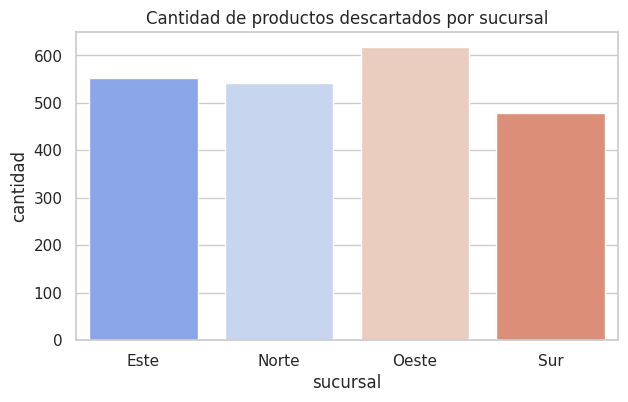

In [14]:
# 🔸 Desperdicio por sucursal
merma_por_sucursal = descarte.groupby("sucursal")["cantidad"].sum().reset_index()
plt.figure(figsize=(7,4))
sns.barplot(data=merma_por_sucursal, x="sucursal", y="cantidad", palette="coolwarm")
plt.title("Cantidad de productos descartados por sucursal")
plt.show()

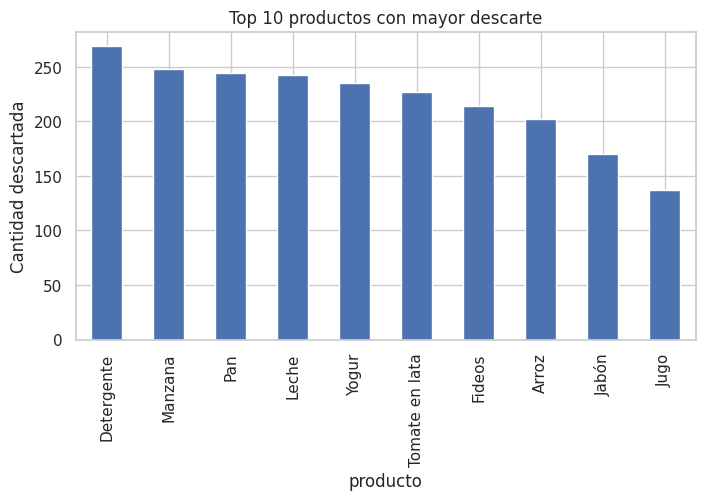

In [15]:
# 🔸 Top productos descartados
top_productos = descarte.groupby("producto")["cantidad"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(8,4))
top_productos.plot(kind='bar')
plt.title("Top 10 productos con mayor descarte")
plt.ylabel("Cantidad descartada")
plt.show()

In [16]:
# 🔸 Detección de productos próximos a vencer (<3 días)
hoy = datetime.now()
inventario["dias_para_vencer"] = (inventario["fecha_vencimiento"] - hoy).dt.days
proximos_vencer = inventario[inventario["dias_para_vencer"] <= 3]
print("\n📦 Productos próximos a vencer (<=3 días):")
display(proximos_vencer.head(10))


📦 Productos próximos a vencer (<=3 días):


,id_producto,producto,categoria,sucursal,stock,fecha_vencimiento,dias_para_vencer
3,4,Detergente,Limpieza,Oeste,107,2025-11-11 12:11:47.153396,3
7,8,Detergente,Lácteos,Norte,150,2025-11-08 12:11:47.153409,0
8,9,Jabón,Enlatados,Oeste,178,2025-11-09 12:11:47.153413,1
16,17,Fideos,Limpieza,Norte,33,2025-11-09 12:11:47.153449,1
17,18,Jabón,Frutas y Verduras,Norte,198,2025-11-08 12:11:47.153452,0
19,20,Manzana,Frutas y Verduras,Sur,103,2025-11-08 12:11:47.153459,0
23,24,Manzana,Bebidas,Oeste,137,2025-11-11 12:11:47.153473,3
27,28,Jugo,Enlatados,Este,62,2025-11-10 12:11:47.153486,2
32,33,Detergente,Lácteos,Norte,163,2025-11-11 12:11:47.153500,3
36,37,Arroz,Panificados,Norte,146,2025-11-10 12:11:47.153512,2


In [17]:
# 🔸 Relación ventas vs desperdicio (por sucursal)
ventas_tot = ventas.groupby("sucursal")["cantidad"].sum()
descartes_tot = descarte.groupby("sucursal")["cantidad"].sum()
comparativo = pd.concat([ventas_tot, descartes_tot], axis=1).fillna(0)
comparativo.columns = ["ventas", "descarte"]
comparativo["% desperdicio"] = (comparativo["descarte"] / comparativo["ventas"] * 100).round(2)
print("\n📊 Porcentaje estimado de desperdicio por sucursal:")
display(comparativo)


📊 Porcentaje estimado de desperdicio por sucursal:


,ventas,descarte,% desperdicio
sucursal,,,
Este,2533,552,21.79
Norte,2750,541,19.67
Oeste,2518,618,24.54
Sur,2346,478,20.38


# 6. Cálculo de indicadores clave (KPIs)



In [18]:
total_ventas = ventas["cantidad"].sum()
total_descartes = descarte["cantidad"].sum()
valor_ventas = (ventas["cantidad"] * ventas["precio_unitario"]).sum()
porcentaje_merma = (total_descartes / total_ventas * 100)

print(f"🛒 Ventas totales: {total_ventas:,}")
print(f"🗑️ Productos descartados: {total_descartes:,}")
print(f"📉 % de merma: {porcentaje_merma:.2f}%")
print(f"💰 Valor total de ventas: ${valor_ventas:,.0f}")

🛒 Ventas totales: 10,147
🗑️ Productos descartados: 2,189
📉 % de merma: 21.57%
💰 Valor total de ventas: $5,416,658


# 7. Visualizaciones analíticas

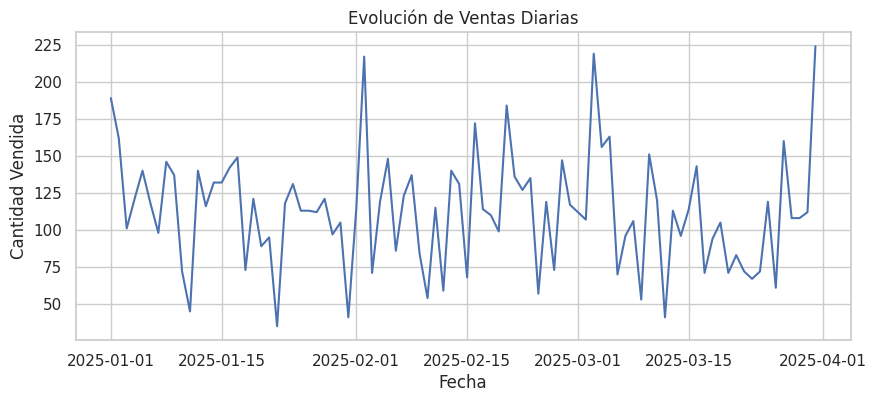

In [19]:
ventas_diarias = ventas.groupby("fecha")["cantidad"].sum().reset_index()
plt.figure(figsize=(10,4))
plt.plot(ventas_diarias["fecha"], ventas_diarias["cantidad"])
plt.title("Evolución de Ventas Diarias")
plt.xlabel("Fecha")
plt.ylabel("Cantidad Vendida")
plt.show()

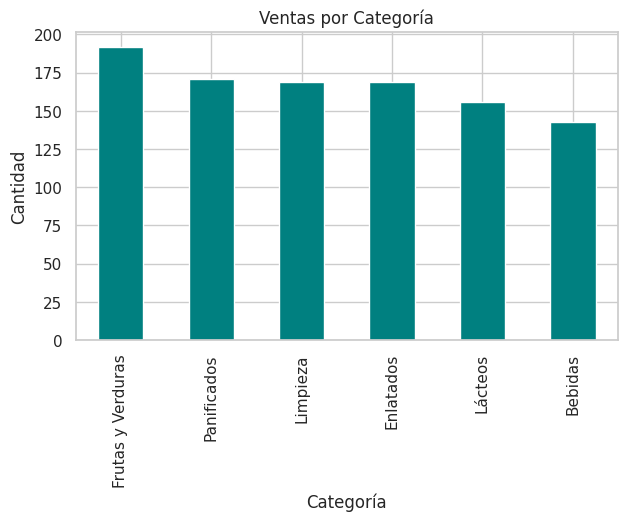

In [20]:
plt.figure(figsize=(7,4))
ventas["categoria"].value_counts().plot(kind="bar", color="teal")
plt.title("Ventas por Categoría")
plt.xlabel("Categoría")
plt.ylabel("Cantidad")
plt.show()

/tmp/ipython-input-3839799311.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=merma.index, y=merma.values, palette="Reds")


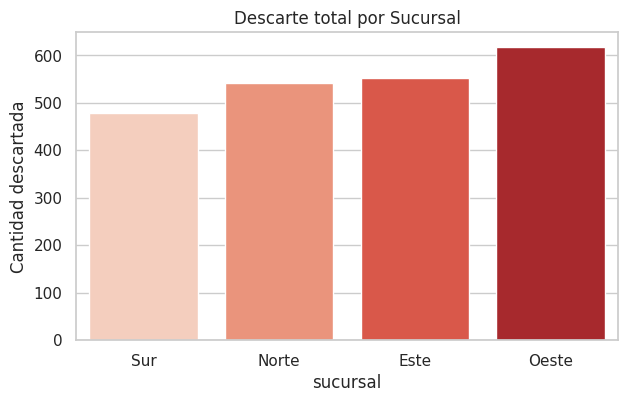

In [21]:
merma = descarte.groupby("sucursal")["cantidad"].sum().sort_values()
plt.figure(figsize=(7,4))
sns.barplot(x=merma.index, y=merma.values, palette="Reds")
plt.title("Descarte total por Sucursal")
plt.ylabel("Cantidad descartada")
plt.show()

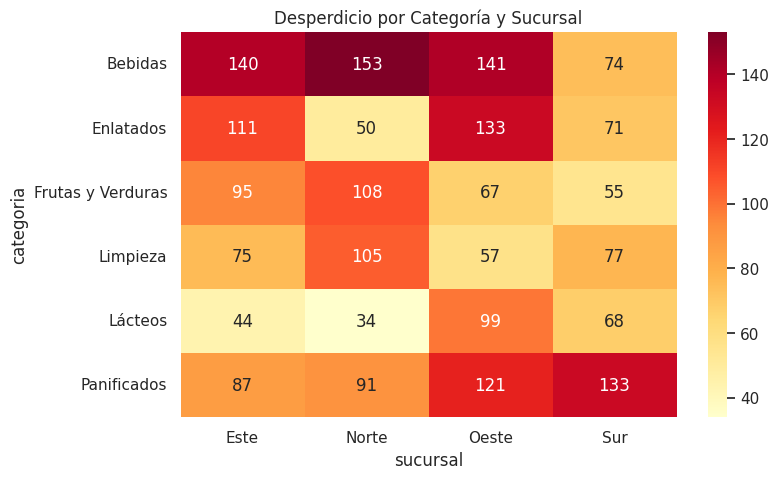

In [22]:
pivot = descarte.pivot_table(values="cantidad", index="categoria", columns="sucursal", aggfunc="sum", fill_value=0)
plt.figure(figsize=(8,5))
sns.heatmap(pivot, annot=True, fmt=".0f", cmap="YlOrRd")
plt.title("Desperdicio por Categoría y Sucursal")
plt.show()

# 8. Correlaciones y relaciones

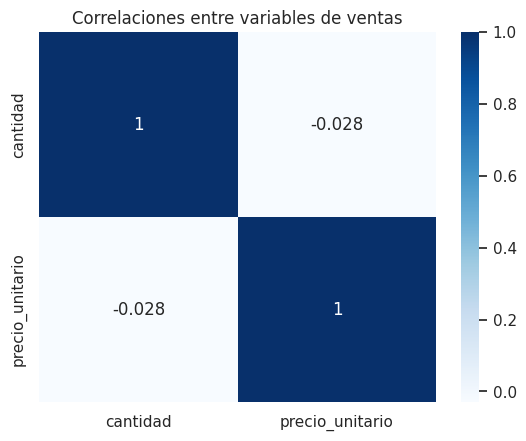

In [23]:
# Matriz de correlación entre variables numéricas
corr = ventas[["cantidad", "precio_unitario"]].corr()
sns.heatmap(corr, annot=True, cmap="Blues")
plt.title("Correlaciones entre variables de ventas")
plt.show()

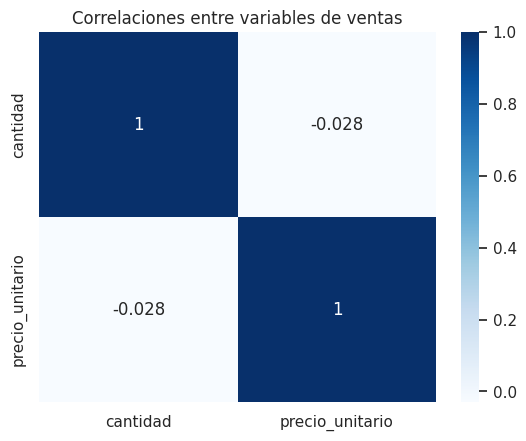

In [24]:
# Matriz de correlación entre variables numéricas
corr = ventas[["cantidad", "precio_unitario"]].corr()
sns.heatmap(corr, annot=True, cmap="Blues")
plt.title("Correlaciones entre variables de ventas")
plt.show()

# 9. Exportación de CSVs

In [25]:
ventas.to_csv("ventas.csv", index=False)
inventario.to_csv("inventario.csv", index=False)
descarte.to_csv("descarte.csv", index=False)
proveedores.to_csv("proveedores.csv", index=False)
comedores.to_csv("comedores.csv", index=False)

from google.colab import files
for archivo in ["ventas.csv","inventario.csv","descarte.csv","proveedores.csv","comedores.csv"]:
    files.download(archivo)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>